In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [231]:
x.shape

(1269,)

Text(0.5, 1.0, 'New PCB')

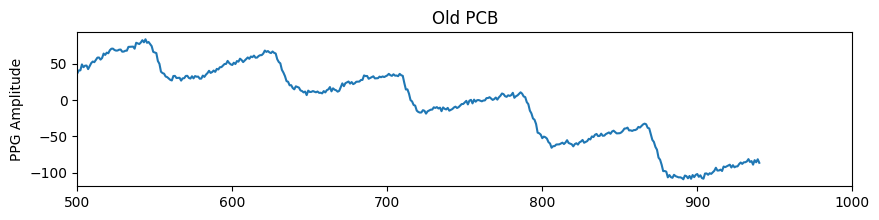

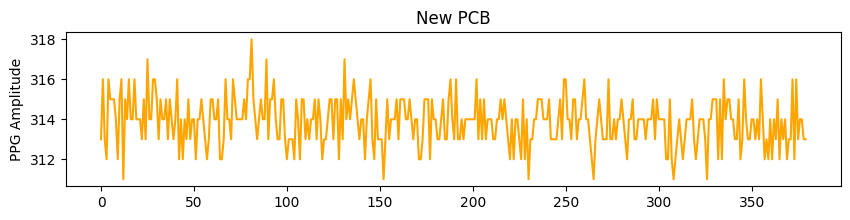

In [252]:
from scipy.signal import detrend


f = plt.figure(figsize=(10, 2))
df_pcb2 = pd.read_csv("/Users/tpfeffer/Downloads/Old.csv")
x = df_pcb2["ecg"].values[0:-100]
x_detrended = detrend(x)

plt.plot(x_detrended)
plt.xlim(500, 1000)
plt.ylabel("PPG Amplitude")
plt.title("Old PCB")
# plt.ylim(13500, 14200)
f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/ble_data.csv")

x = df_pcb3["ecg"].values[0:-100]
# detrend x
x_detrended = detrend(x)

plt.plot(x, c="orange")
# plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")

# plt.xlim(500,1000)
# plt.ylim(-700, 700)

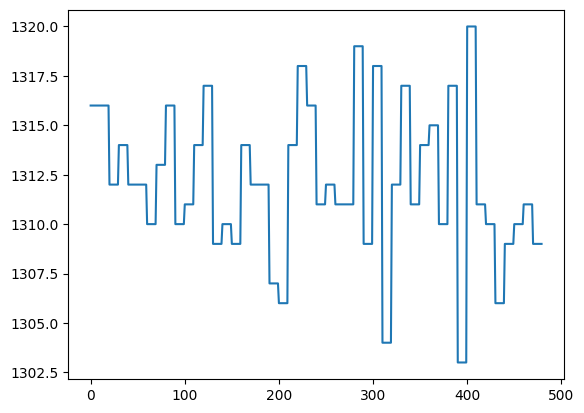

In [253]:
plt.plot(df_pcb3["resp"])

In [234]:
# remove zeros

x = df_pcb3["timestamp"].values.copy()

# remove zeros
x = x[x != 0]

y = np.diff(x)
y = y[y > 0]

y / 1000

array([100.86 , 100.922, 100.952, 100.922, 100.952, 100.952, 100.922,
       100.952, 100.952, 100.952, 100.922, 100.952, 100.952, 100.952,
       101.013, 100.861, 100.952, 100.952, 100.952, 100.952, 100.953,
       100.952, 100.952, 100.952, 100.952, 100.922, 100.952, 100.952,
       100.952, 100.952, 100.953, 100.952, 100.952, 100.952, 100.952,
       100.952, 101.014, 100.891, 100.952, 100.982, 100.922, 100.983,
       100.952, 100.952, 100.983, 100.921, 100.983, 100.952, 100.952,
       100.952, 100.953, 101.074, 100.83 , 100.952, 100.922, 100.952,
       100.952, 100.952, 100.952, 100.983, 100.952, 100.952, 100.922,
       100.983, 100.952, 100.921, 100.952, 100.983, 100.952, 100.952,
       100.953, 100.952, 100.952, 100.952, 100.952, 100.952, 100.983,
       100.952, 100.952, 100.952, 100.953, 100.982, 100.922, 100.952,
       100.983, 100.952, 100.952, 100.952, 101.074, 100.83 , 100.953,
       100.952, 100.921, 100.983, 100.922, 100.952, 100.952, 100.952,
       100.952, 100.

In [189]:
int(9.8)

9

Text(0.5, 1.0, 'New PCB')

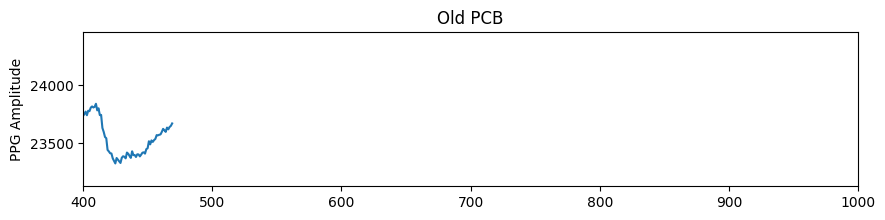

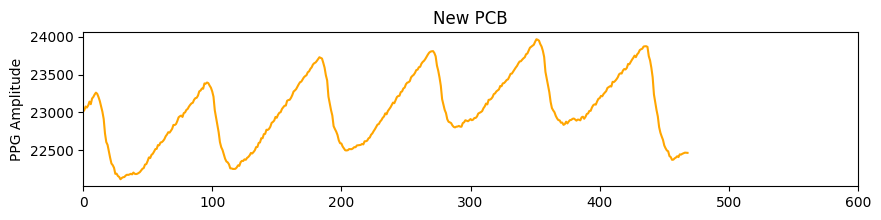

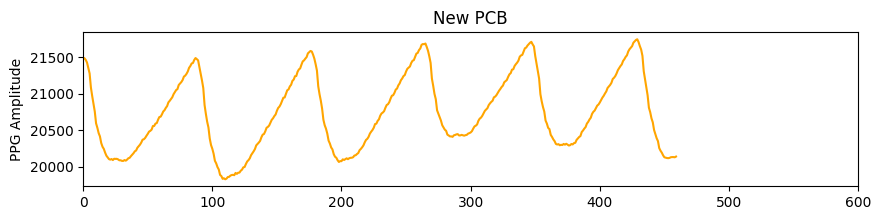

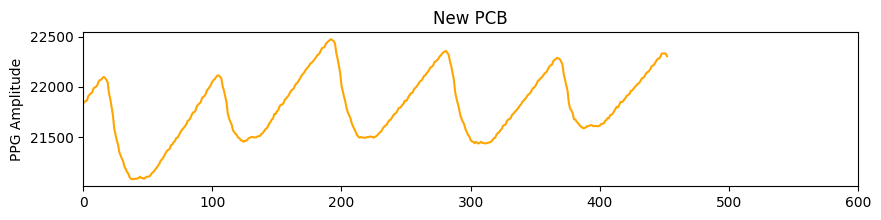

In [83]:
f = plt.figure(figsize=(10, 2))
df_pcb2 = pd.read_csv("/Users/tpfeffer/Downloads/Adc0.csv")

plt.plot(df_pcb2["ecg"])
plt.xlim(400, 1000)
plt.ylabel("PPG Amplitude")
plt.title("Old PCB")
f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/Adc1.csv")

plt.plot(df_pcb3["ecg"].values[0:-100], c="orange")
plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")

f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/Adc2.csv")

plt.plot(df_pcb3["ecg"].values[0:-100], c="orange")
plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")

f = plt.figure(figsize=(10, 2))
df_pcb3 = pd.read_csv("/Users/tpfeffer/Downloads/Adc3.csv")

plt.plot(df_pcb3["ecg"].values[0:-100], c="orange")
plt.xlim(0, 600)
plt.ylabel("PPG Amplitude")
plt.title("New PCB")


# plt.xlim(600,800)
# plt.ylim(190, 210)

24.37142857142857

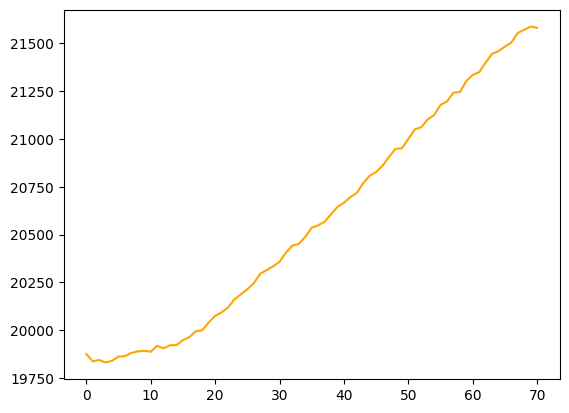

In [128]:
df_pcb2 = pd.read_csv("/Users/tpfeffer/Downloads/Adc2.csv")
plt.plot(df_pcb2["ecg"].values[107:178], c="orange")


np.mean(np.diff((df_pcb2["ecg"].values[107:178])))

14.385714285714286

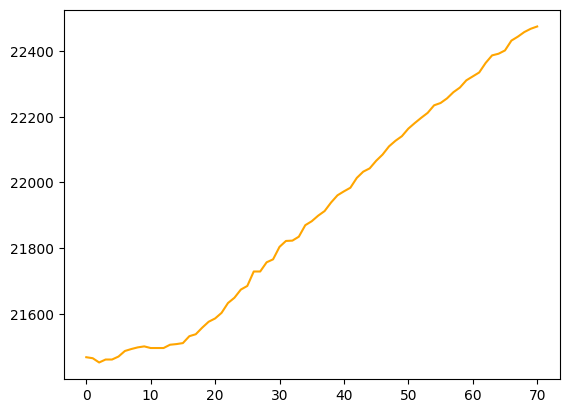

In [152]:
df_pcb = pd.read_csv("/Users/tpfeffer/Downloads/Adc3.csv")

plt.plot(df_pcb3["ecg"].values[122:193], c="orange")

np.mean(np.diff((df_pcb3["ecg"].values[122:193])))

# print(193-122)

70


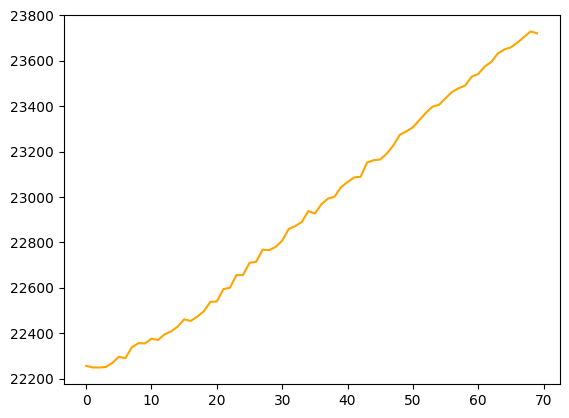

In [150]:
df_pcb1 = pd.read_csv("/Users/tpfeffer/Downloads/Adc1.csv")
plt.plot(df_pcb1["ecg"].values[115:185], c="orange")


np.mean(np.diff((df_pcb1["ecg"].values[115:185])))

print(185-115)

11.666666666666666

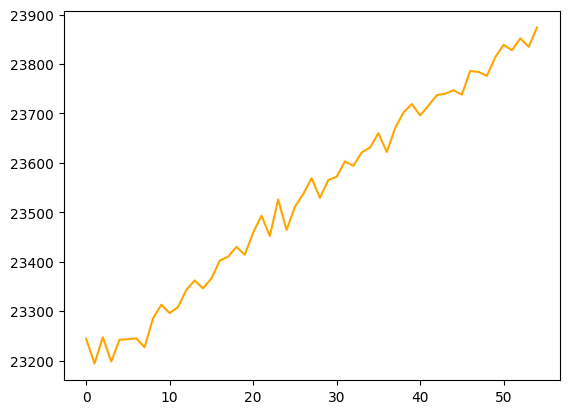

In [149]:
df_pcb1 = pd.read_csv("/Users/tpfeffer/Downloads/Adc0.csv")
plt.plot(df_pcb1["ecg"].values[270:325], c="orange")


np.mean(np.diff((df_pcb1["ecg"].values[270:325])))